# Сбор данных

Первый этап любой работы с данными - это их сбор. Тут возможны варианты в зависимости от ситуации и от глобальной задачи. Три общих подхода к сбору данных на Python:
1. скрейпинг, т.е. извлечение данных с веб-страниц
2. парсинг данных по API
3. использование уже написанных библиотек
4. сбор собственного корпуса вручную

# Упражнение 1. Работа с API

[Текст ссылки](https://)Есть проект "Конструктор ОП" http://op.itmo.ru

## Задание 1.0

Доступ к контенту появляется после регистрации. Можно войти через ИСУ, первый вход = регистрация. Для целей лабораторной работы можно либо создать пользователя, либо воспользоваться тестовым.

В процессе работы нужно будет получить данные по API. Собрать по этим данным датасет (например, можно воспользоваться библиотекой pandas). После провести первичный анализ и сделать визуализации.

In [50]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [51]:
url = 'https://op.itmo.ru/auth/token/login'
auth_data = {'username': 'analytic', 'password': 'datatest'}

In [52]:
token_txt = requests.post(url, auth_data).text

In [53]:
token = json.loads(token_txt)['auth_token']
headers = {'Content-Type': 'application/json', 'Authorization': 'Token ' + token}

## Задание 1.1 Получить идентификаторы всех учебных планов, имеющихся в op.itmo.ru

In [54]:
# https://op.itmo.ru/api/record/academic_plan/academic_wp_description/all

In [55]:
next = 'https://op.itmo.ru/api/academicplan/short?page=1&search=&ordering='
academic_plan_ids = []

while next != None:
    request_data = requests.get(
        f'{next}',
        cookies={'access_token': f'{token}'}).text

    data = json.loads(request_data)
    # print(data)

    next = data.get('next')
    # print(next)

    temp_results = data.get('results')  # array 
    # print(temp_results)
    for result in temp_results:
        year = result.get('academic_plan_in_field_of_study')[0].get('year')
        # print(year)
        if year != 2023 and year != 2024:
            continue
        id = result.get('id')
        academic_plan_ids.append(id)

In [56]:
academic_plan_ids.sort()
writer = open('./jsons/academic_plan_ids.json', 'w', encoding='utf-8')
writer.write(json.dumps(academic_plan_ids))
writer.close()
print(academic_plan_ids)

[7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7341, 7342, 7343, 7344, 7345, 7346, 7347, 7348, 7349, 7350, 7351, 7352, 7353, 7354, 7355, 7356, 7357, 7358, 7359, 7360, 7361, 7362, 7364, 7365, 7366, 7367, 7368, 7369, 7370, 7371, 7372, 7373, 7374, 7375, 7376, 7377, 7378, 7379, 7380, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7388, 7389, 7390, 7391, 7392, 7393, 7394, 7395, 7396, 7397, 7398, 7399, 7400, 7401, 7402, 7403, 7404, 7405, 7406, 7407, 7408, 7409, 7410, 7411, 7484, 7485, 7487, 7491, 7492, 7493, 7494, 7495, 7496, 7497, 7498, 7499, 7500, 7501, 7502, 7503, 7504, 7505, 7506, 7507, 7515, 7516, 7517, 7519, 7521, 7522, 7523, 7524, 7525, 7526, 7527, 7528, 7529, 7530, 7531, 7532, 7533, 7534, 7535, 7536, 7537, 7539, 7540, 7541, 7542, 7543, 7544, 7545, 754

Пример ответа (фрагмент)

In [57]:
# 'results': [
#         {
#             'id': 6796,
#             'academic_plan_in_field_of_study': [
#                 {
#                     'id': 6859,
#                     'ap_isu_id': 10572,
#                     'year': 2018,
#                     'title': 'Нанофотоника и квантовая оптика'
#                 }
#             ],
#             'wp_in_academic_plan': [
#                 {
#                     'id': 2623,
#                     'discipline_code': '5546',
#                     'title': 'История',
#                     'description': null,
#                     'status': 'WK'
#                 },

Обратите внимание, что у плана есть два разных id. Вам нужно разобраться, какой именно id нужно использовать для следующего пункта задания.


## Задание 1.2 По этим планам получить детальное описание

In [58]:
# https://op.itmo.ru/api/academicplan/detail/<id>

# пример вызова https://op.itmo.ru/api/academicplan/detail/7292

Планов очень много. Скачивать нужно только планы 2023 и 2024 года набора.

('results' -> 'academic_plan_in_field_of_study' -> 'year')

На основе описаний сделать датасет, состоящий из одной или нескольких таблиц. Добавить время скачивания.

Учтите, что количество планов около 300, скачиваться может довольно долго.

### Загрузка детального описания учебных планов 2023-2024 годов (274 штуки)

In [59]:
# academic_plans = []
# counter = 1
# print(len(academic_plan_ids))
# 
# start_time = time.time()
# download_time = 0
# 
# for id in academic_plan_ids:
#   single_plan_time = time.time()
# 
#   request_data = requests.get(
#           f'https://op.itmo.ru/api/academicplan/detail/{id}',
#           cookies={'access_token': f'{token}'}).text
# 
#   data = json.loads(request_data)
#   academic_plans.append(data)
# 
#   writer = open('./jsons/detailed_academic_plans.json', 'a', encoding='utf-8')
#   writer.write(
#     f'{json.dumps(data, indent=2, ensure_ascii=False)},\n')
#   writer.close()
# 
#   print(f'{counter}/{len(academic_plan_ids)} ({time.time() - single_plan_time}s): {id}')
#   counter += 1
# download_time = time.time() - start_time

### Время загрузки

In [60]:
# print(download_time)

Время скачки хранится в переменной `download_time`, но поскольку я делал всю работу и загрузку локально в Pycharm, то могу лишь приложить скриншот того, какое значение там было или же при защите продемонстрировать экран с открытым локальным проектом и подтверждением времени. Иначе бы мне пришлось заново в colab делать 274 запроса, каждый из которых длится от 30 до 120 секунд, что является довольно не маленьким временем. 

### Загрузка тех же ^ заранее записанных данных из `.json` файла.

In [61]:
reader = open('./jsons/detailed_academic_plans.json', 'r', encoding='utf-8')
file_content = reader.read()
academic_plans = json.loads(file_content)

df = pd.DataFrame(academic_plans)
df.head(10)

,id,educational_profile,number,approval_date,discipline_blocks_in_academic_plan,year,education_form,qualification,author,academic_plan_in_field_of_study,ap_isu_id,on_check,excel_generation_errors,laboriousness,can_edit,can_validate,was_send_to_isu,rating
0,7291,None,None,2022-11-30T20:04:16.661368Z,"[{'id': 29298, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7355, 'year': 2023, 'qualification': '...",18339.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False
1,7292,None,None,2022-11-30T20:04:16.709553Z,"[{'id': 29302, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7356, 'year': 2023, 'qualification': '...",18337.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False
2,7293,None,None,2022-11-30T20:04:16.726933Z,"[{'id': 29306, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7357, 'year': 2023, 'qualification': '...",18338.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False
3,7294,None,None,2022-11-30T20:04:16.744468Z,"[{'id': 29310, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7358, 'year': 2023, 'qualification': '...",18340.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",237,False,False,True,False
4,7295,None,None,2022-11-30T20:04:16.759945Z,"[{'id': 29314, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7359, 'year': 2023, 'qualification': '...",18341.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False
5,7296,None,None,2022-11-30T20:04:16.773848Z,"[{'id': 29318, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7360, 'year': 2023, 'qualification': '...",18342.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False
6,7297,None,None,2022-11-30T20:04:16.787354Z,"[{'id': 29322, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7361, 'year': 2023, 'qualification': '...",18343.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",241,False,False,True,False
7,7298,None,None,2022-11-30T20:04:16.803285Z,"[{'id': 29326, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7362, 'year': 2023, 'qualification': '...",18344.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False
8,7299,None,None,2022-11-30T20:04:16.820158Z,"[{'id': 29330, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7363, 'year': 2023, 'qualification': '...",18345.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False
9,7300,None,None,2022-11-30T20:04:16.836196Z,"[{'id': 29334, 'name': 'Блок 1. Модули (дисцип...",None,None,None,NaN,"[{'id': 7364, 'year': 2023, 'qualification': '...",18346.0,verified,"{'wp_err': ['В РПД 17526 ""Физическая культура ...",240,False,False,True,False


## Задание 1.3 Построить графики и проанализировать

Построить графики: количество планов по годам набора, квалификациям (field_of_study -> 0 -> qualification), структурным подразделениям (structural unit -> title или short_title) и количеству редакторов.

Для планов 2023 и 2024 годов набора построить график с распределением статусов (on_check).

Напишите выводы по графикам

In [62]:
plans_number = {
    2023: {
        'count': 0,
        'bachelor': 0,
        'master': 0,
        'verified': 0,
        'in_work': 0,
        'on_check': 0
    },
    2024: {
        'count': 0,
        'bachelor': 0,
        'master': 0,
        'verified': 0,
        'in_work': 0,
        'on_check': 0
    }
}
qualifications_number = {}
structural_units_number = {}
editors_number = {}

for plan in academic_plans:
    year = plan.get('academic_plan_in_field_of_study')[0].get('year')
    on_check = plan.get('on_check')
    qualification = plan.get('academic_plan_in_field_of_study')[0].get('qualification')
    if year == 2023:
        plans_number.get(2023)['count'] += 1
        plans_number.get(2023)[on_check] += 1
        plans_number.get(2023)[qualification] += 1
    else:
        plans_number.get(2024)['count'] += 1
        plans_number.get(2024)[on_check] += 1
        plans_number.get(2024)[qualification] += 1

    if qualifications_number.get(qualification) is None:
        qualifications_number[qualification] = 1
    else:
        qualifications_number[qualification] += 1

    try:
        structural_unit = plan.get('academic_plan_in_field_of_study')[0].get('structural_unit').get('short_name')
    except AttributeError:
        structural_unit = "null"
    if structural_units_number.get(structural_unit) is None:
        structural_units_number[structural_unit] = 1
    else:
        structural_units_number[structural_unit] += 1

    editors = len(plan.get('academic_plan_in_field_of_study')[0].get('editors'))
    if editors_number.get(editors) is None:
        editors_number[editors] = 1
    else:
        editors_number[editors] += 1

# print(plans_number)
# print(qualifications_number)
# print(structural_units_number)
# print(editors_number)

In [63]:
bar_width = 0.85

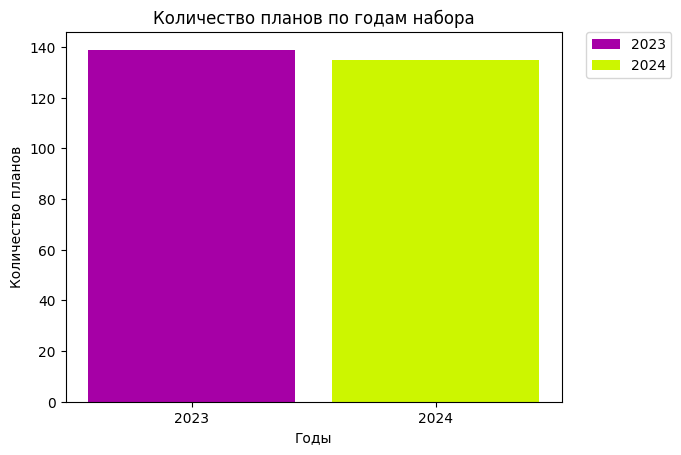

In [64]:
plt.bar(2023, plans_number.get(2023).get('count'), color='#A600A6', width=bar_width, label='2023')
plt.bar(2024, plans_number.get(2024).get('count'), color='#CCF600', width=bar_width, label='2024')

plt.xlabel("Годы")
plt.ylabel("Количество планов")
plt.title("Количество планов по годам набора")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(range(2023,2025))
plt.show()

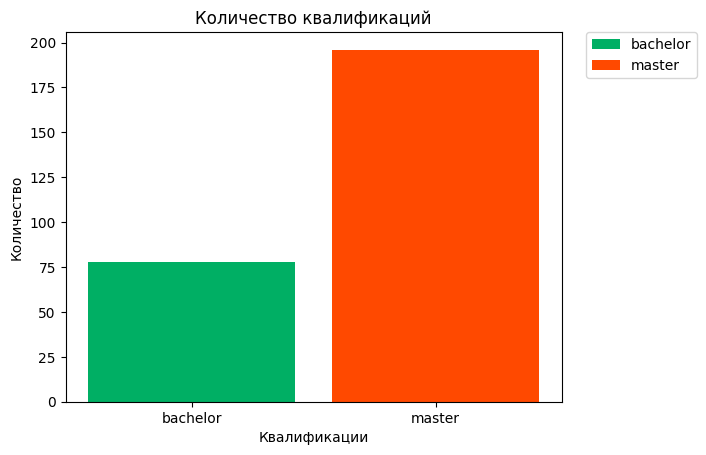

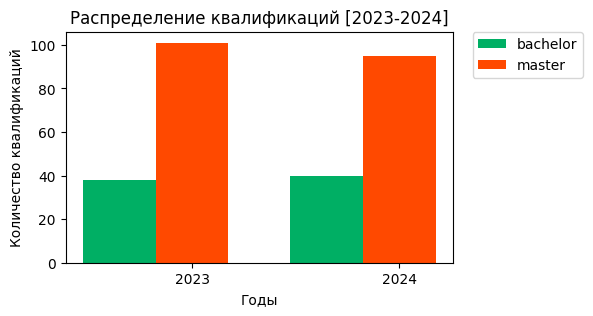

In [65]:
plt.bar('bachelor', qualifications_number.get('bachelor'), color='#00AF64', width=bar_width, label='bachelor')
plt.bar('master', qualifications_number.get('master'), color='#FF4900', width=bar_width, label='master')

plt.xlabel("Квалификации")
plt.ylabel("Количество")
plt.title("Количество квалификаций")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

bar_width = 0.35
fig = plt.subplots(figsize=(5, 3))

bachelor = [plans_number.get(2023).get('bachelor'), plans_number.get(2024).get('bachelor')]
master = [plans_number.get(2023).get('master'), plans_number.get(2024).get('master')]

br1 = np.arange(len(bachelor))
br2 = [x + bar_width for x in br1]

plt.bar(br1, bachelor, color='#00AF64', width=bar_width, label='bachelor')
plt.bar(br2, master, color='#FF4900', width=bar_width, label='master')

plt.xlabel('Годы')
plt.ylabel('Количество квалификаций')
plt.xticks([r + bar_width for r in range(len(bachelor))],
           ['2023', '2024'])
plt.title("Распределение квалификаций [2023-2024]")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [66]:
bar_width = 0.85

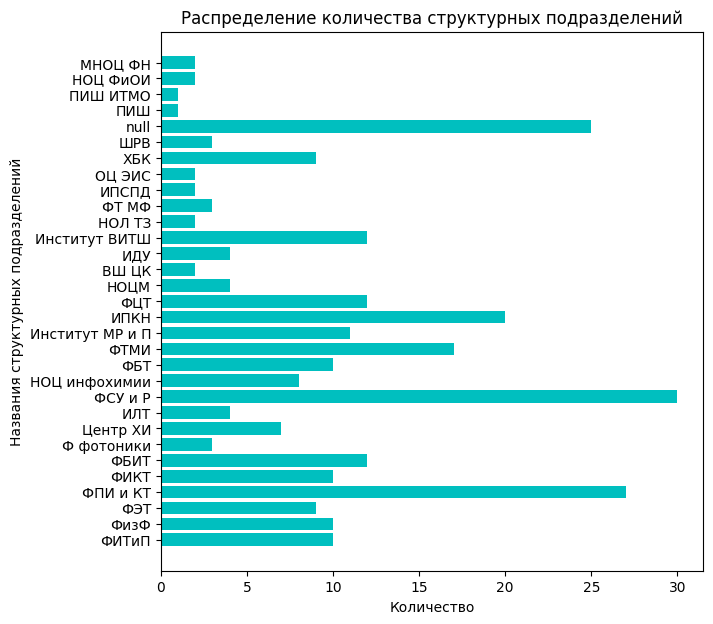

In [67]:
plt.figure(figsize=(7, 7))
for structural_unit in structural_units_number:
    plt.barh(structural_unit, structural_units_number.get(structural_unit), color='c')

plt.xlabel("Количество")
plt.ylabel("Названия структурных подразделений")
plt.title("Распределение количества структурных подразделений")
plt.show()

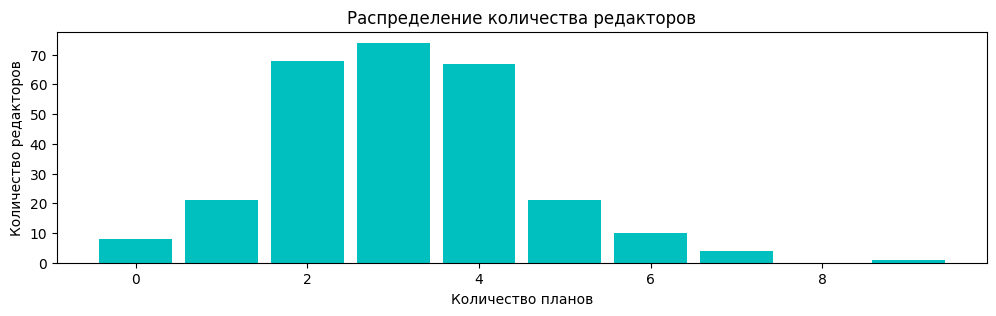

In [68]:

plt.figure(figsize=(12, 3))
for editor in editors_number:
    plt.bar(editor, editors_number.get(editor), color='c', width=bar_width)

plt.xlabel("Количество планов")
plt.ylabel("Количество редакторов")
plt.title("Распределение количества редакторов")
plt.show()


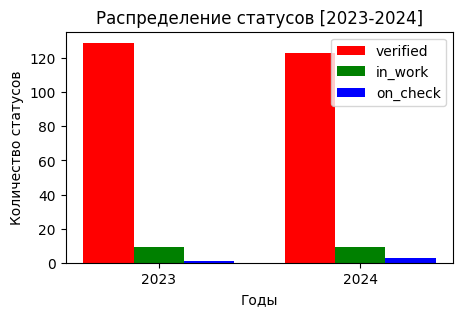

In [69]:
bar_width = 0.25
fig = plt.subplots(figsize=(5, 3))

verified = [plans_number.get(2023).get('verified'), plans_number.get(2024).get('verified')]
in_work = [plans_number.get(2023).get('in_work'), plans_number.get(2024).get('in_work')]
on_check = [plans_number.get(2023).get('on_check'), plans_number.get(2024).get('on_check')]

br1 = np.arange(len(verified))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, verified, color='r', width=bar_width, label='verified')
plt.bar(br2, in_work, color='g', width=bar_width, label='in_work')
plt.bar(br3, on_check, color='b', width=bar_width, label='on_check')

plt.xlabel('Годы')
plt.ylabel('Количество статусов')
plt.xticks([r + bar_width for r in range(len(verified))],
           ['2023', '2024'])
plt.title("Распределение статусов [2023-2024]")

plt.legend()
plt.show()

### Выводы

По графику о количестве планов по годам видно, что в 2023 и 2024 мы имеем примерно равное количество планов: 139 и 135 планов соответственно

Исходя из графиков о квалификациях можно сказать, что количество бакалаврских планов с 2023 по 2024 года незначительно увеличивается (38 -> 40), а магистрантских наоборот уменьшается (101 -> 95). При этом планов для бакалавров примерно в 2.5 (2023: 2.657; 2024: 2.375) раза меньше, чем для магистров. 

Говоря о графике распределения количества планов по структурным подразделениям можно заметить, что лидирующими позициями по количеству являются такие, как:
1. ФСУ и Р - 30 штук
2. ФПИ и КТ - 27 штук
3. ИПКН - 20 штук (`null` в расчёт не берем, поскольку это те планы, где не было указано направление)

Если смотреть на график о количестве редакторов в учебном плане, то можно заметить, что в большинстве планов редакторов оказалось от 2 до 4 штук.

Анализируя график распределения статусов по 2023-2024 годам можно увидеть, что значения сильно не разнятся в зависимости от года, однако стоит отметить, что в 2024 году всё же меньше планов со значением `verified` - 123 штуки, когда в 2023 их 129 штук. А также со статусом `on_check` в 2024 их на 2 больше, чем в 2023 году.

## Задание 1.4 Анализ


Найдите планы со статусом проверенные ('verified'), у которых некорректная трудоемкость (laboriousness). Корректная трудоемкость для бакалавриата - 240, для магистратуры - 120.

Для таких планов выведите год набора, id плана, ИСУ ИД плана (это уже третий id плана, и он всегда состоит из 5 цифр), название структурного подразделения (structural unit -> title) и список редакторов (editors)

In [70]:
verified_academic_plans_incorrect_laboriousness = []

for plan in academic_plans:
    on_check = plan.get('on_check')
    if on_check != 'verified':
        continue

    qualification = plan.get('academic_plan_in_field_of_study')[0].get('qualification')
    laboriousness = plan.get('laboriousness')
    if laboriousness == 240 and qualification == 'bachelor':
        continue
    if laboriousness == 120 and qualification == 'master':
        continue

    year = plan.get('academic_plan_in_field_of_study')[0].get('year')
    id = plan.get('id')
    ap_isu_id = plan.get('ap_isu_id')
    try:
        title = plan.get('academic_plan_in_field_of_study')[0].get('field_of_study')[0].get('title')
    except IndexError:
        title = None
    editors = plan.get('academic_plan_in_field_of_study')[0].get('editors')
    verified_academic_plans_incorrect_laboriousness.append({
        'year': year,
        'id': id,
        'ap_isu_id': ap_isu_id,
        'title': title,
        'editors': editors,
        'qualification': qualification,
        'on_check': on_check,
        'laboriousness': laboriousness,
    })

In [71]:
df = pd.DataFrame(verified_academic_plans_incorrect_laboriousness)
df.head(100)

,year,id,ap_isu_id,title,editors,qualification,on_check,laboriousness
0,2023,7294,18340.0,Экология и природопользование,"[{'id': 110, 'username': '241191', 'first_name...",bachelor,verified,237
1,2023,7297,18343.0,Прикладная информатика,"[{'id': 253, 'username': '105760', 'first_name...",bachelor,verified,241
2,2023,7315,18361.0,Химическая технология,"[{'id': 936, 'username': '337555', 'first_name...",bachelor,verified,237
3,2023,7316,18362.0,Биотехнология,"[{'id': 2044, 'username': '275087', 'first_nam...",bachelor,verified,236
4,2023,7321,18366.0,Интеллектуальные системы в гуманитарной сфере,"[{'id': 466, 'username': '103466', 'first_name...",bachelor,verified,241
5,2023,7385,18414.0,Энерго- и ресурсосберегающие процессы в химиче...,"[{'id': 100, 'username': '165829', 'first_name...",master,verified,102
6,2023,7386,18416.0,Техносферная безопасность,"[{'id': 100, 'username': '165829', 'first_name...",master,verified,102
7,2023,7390,18405.0,Биотехнология,"[{'id': 2044, 'username': '275087', 'first_nam...",master,verified,156
8,2023,7401,18397.0,Инноватика,"[{'id': 2024, 'username': '364389', 'first_nam...",master,verified,126
9,2023,7500,28097.0,Прикладная информатика,"[{'id': 51, 'username': '134011', 'first_name'...",bachelor,verified,183
